In [1]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# loading data

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 9s 2us/step


In [3]:
# shape of data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
# data type of dataset
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [5]:
# creating validation data snd scaling data to range (0-1)

X_valid, X_train = X_train[:4000], X_train[4000:] / 255
y_valid, y_train = y_train[:4000], y_train[4000:]
X_test = X_test / 255

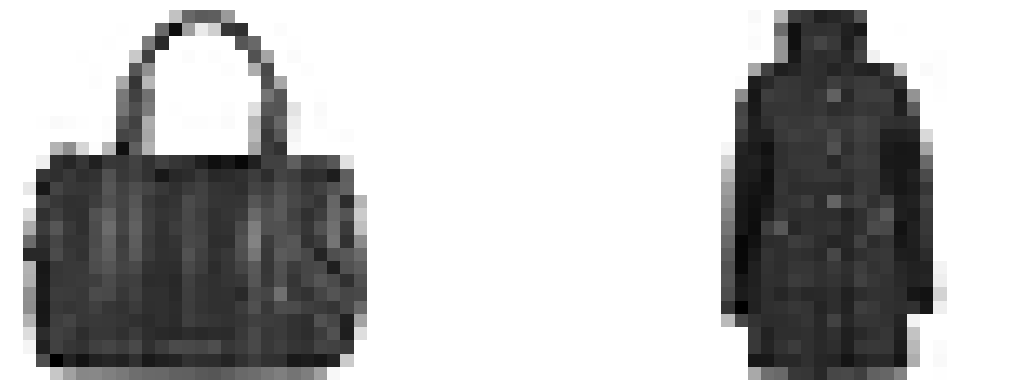

In [6]:
# looking at first two images

plt.figure(figsize = (15, 4))
plotnumber = 1

for i in range(2):
    if plotnumber <= 2:
        ax = plt.subplot(1, 2, plotnumber)
        plt.imshow(X_train[i], cmap = 'binary')
        plt.axis('off')
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [7]:
y_train

array([8, 4, 3, ..., 3, 0, 5], dtype=uint8)

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]], class_names[y_train[1]] 

('Bag', 'Coat')

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>The validation set contains 4,000 images, and the test set contains 10,000 images:</strong></p> 

In [10]:
X_valid.shape

(4000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

<p style = "font-size : 40px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Let’s take a look at a sample of the images in the dataset:</strong></p> 

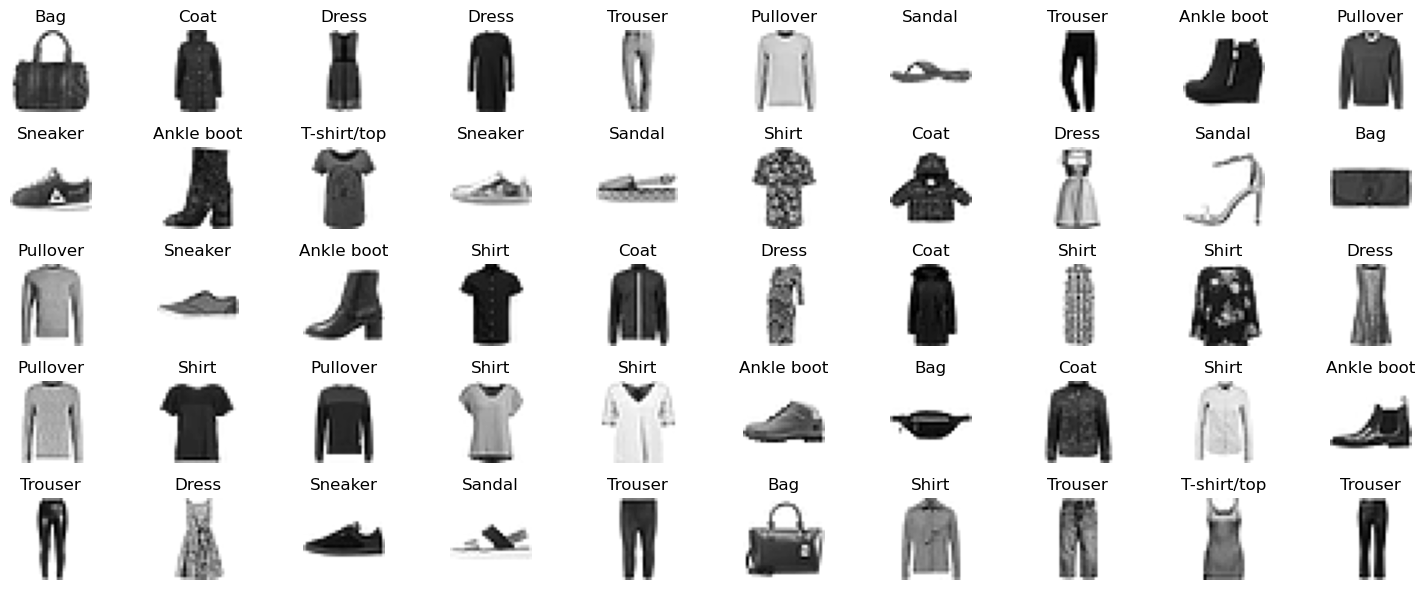

In [12]:
plt.figure(figsize = (15, 6))
plotnumber = 1

for i in range(51):
    if plotnumber <= 50:
        ax = plt.subplot(5, 10, plotnumber)
        plt.imshow(X_train[i], cmap = 'binary')
        plt.axis('off')
        plt.title(class_names[y_train[i]], fontdict = {'fontsize'  : 12, 'color' : 'black'})
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

<p style = "font-size : 45px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Model Building</strong></p> 

In [13]:
# building sequential model

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(70, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [14]:
# summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 70)                7070      
                                                                 
 dense_2 (Dense)             (None, 50)                3550      
                                                                 
 dense_3 (Dense)             (None, 20)                1020      
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
Total params: 90,350
Trainable params: 90,350
Non-traina

<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Compiling the Image Classification Model</strong></p> 

In [15]:
# compiling model

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Training and Evaluating the Image Classification Model</strong></p> 

In [16]:
# fitting model

model_history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 50)

Epoch 1/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.5314 - accuracy: 0.8118 - val_loss: 59.4278 - val_accuracy: 0.8413
Epoch 2/50
1750/1750 [==============================] - 4s 2ms/step - loss: 0.3801 - accuracy: 0.8600 - val_loss: 66.7624 - val_accuracy: 0.8217
Epoch 3/50
1750/1750 [==============================] - 4s 2ms/step - loss: 0.3440 - accuracy: 0.8734 - val_loss: 47.2139 - val_accuracy: 0.8540
Epoch 4/50
1750/1750 [==============================] - 4s 2ms/step - loss: 0.3211 - accuracy: 0.8829 - val_loss: 44.9507 - val_accuracy: 0.8533
Epoch 5/50
1750/1750 [==============================] - 4s 2ms/step - loss: 0.3067 - accuracy: 0.8859 - val_loss: 44.0819 - val_accuracy: 0.8630
Epoch 6/50
1750/1750 [==============================] - 4s 3ms/step - loss: 0.2897 - accuracy: 0.8922 - val_loss: 49.5222 - val_accuracy: 0.8615
Epoch 7/50
1750/1750 [==============================] - 4s 2ms/step - loss: 0.2796 - accuracy: 0.8961 - val_loss: 44.0589 - val_ac

In [17]:
# evaluating model

model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.5437 - accuracy: 0.8870


[0.5437353849411011, 0.8870000243186951]

In [21]:
# making predictions

y_probs = model.predict(X_test)
y_preds = y_probs.argmax(axis = 1)

y_preds[:100]

313/313 [==============================] - 1s 1ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0, 2, 5,
       7, 5, 1, 2, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 9,
       6, 7, 2, 1, 2, 6, 4, 2, 5, 8, 2, 2, 8, 2, 8, 0, 7, 7, 8, 5, 1, 1,
       3, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
       0, 2, 5, 3, 6, 7, 1, 8, 0, 1, 2, 2], dtype=int64)

In [22]:
# function for confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

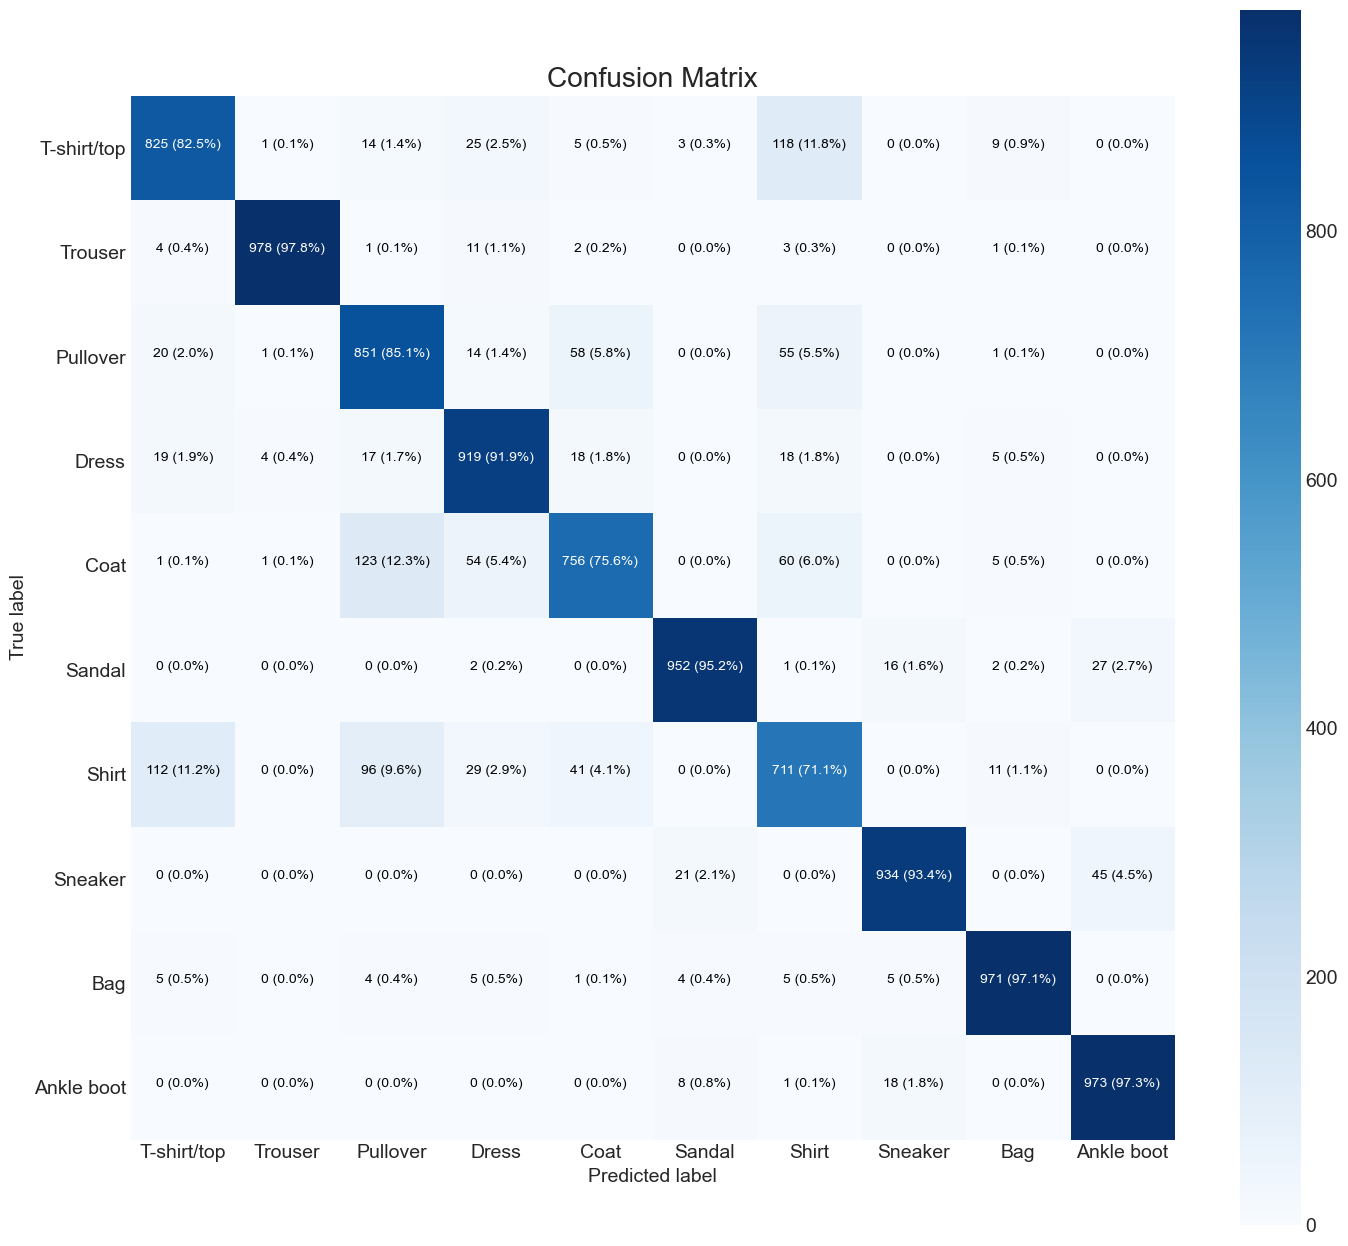

In [23]:
plt.style.use('seaborn-dark')
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [24]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Looking at some Random Predictions</strong></p> 

1/1 [==============================] - 0s 16ms/step


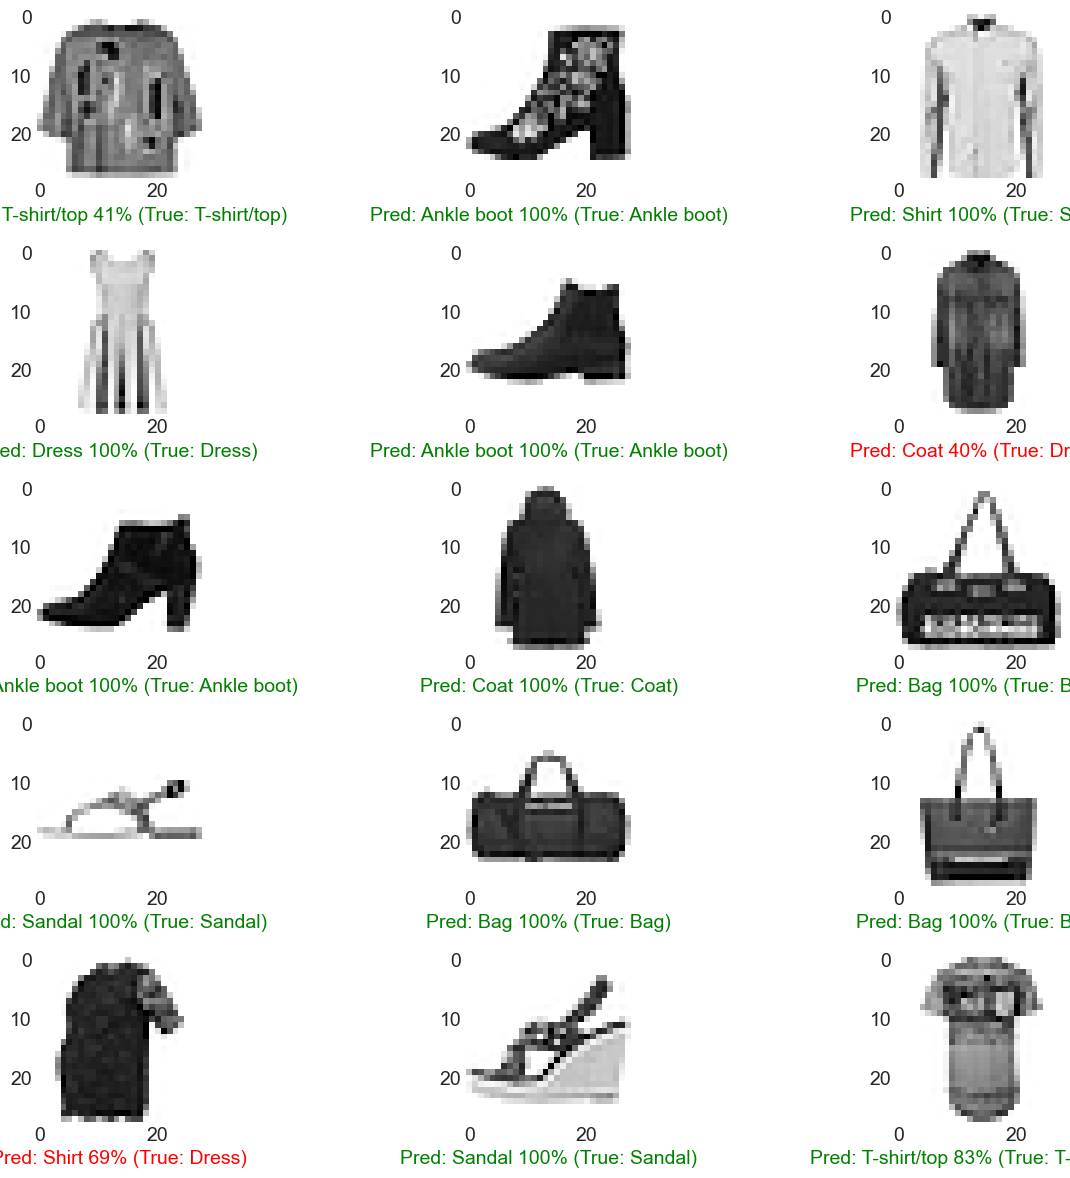

In [25]:
plt.figure(figsize = (15, 12))
plotnumber = 1

for i in range(15):
    if plotnumber <= 15:
        ax = plt.subplot(5, 3, plotnumber)
        plot_random_image(model=model, 
                  images=X_test, 
                  true_labels=y_test, 
                  classes=class_names)
        
    plotnumber += 1
  
plt.tight_layout()
plt.show()

<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Use the Model to Make Predictions</strong></p> 

In [26]:
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 20ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [28]:
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 20ms/step


array([[1.61228513e-07, 5.77249240e-13, 9.82627781e-12, 5.54357804e-08,
        1.05150162e-13, 5.64443435e-05, 3.27728991e-08, 4.47633684e-05,
        1.40798635e-08, 9.99898553e-01],
       [2.28655636e-10, 7.26634305e-21, 9.99937892e-01, 1.06754429e-13,
        1.13820170e-06, 2.21007043e-16, 6.09588860e-05, 5.55589874e-33,
        1.35998575e-24, 5.77261178e-27],
       [3.45207794e-21, 1.00000000e+00, 7.47583679e-24, 2.54887517e-18,
        1.21206143e-21, 2.22099782e-26, 1.33798112e-20, 3.58171579e-35,
        1.99355614e-12, 4.29510501e-33],
       [5.46956239e-17, 1.00000000e+00, 9.17380199e-20, 5.53060744e-13,
        2.41543687e-18, 2.17331576e-20, 3.45702813e-16, 9.26803230e-28,
        3.85455938e-11, 1.20707043e-26],
       [1.02633936e-02, 3.23573336e-17, 9.54554594e-07, 3.92695121e-09,
        4.50200730e-08, 4.92924571e-22, 9.89735603e-01, 4.04887590e-29,
        3.94961702e-11, 1.36104393e-22]], dtype=float32)

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Here, the classification model actually classified all five images correctly</strong></p> 

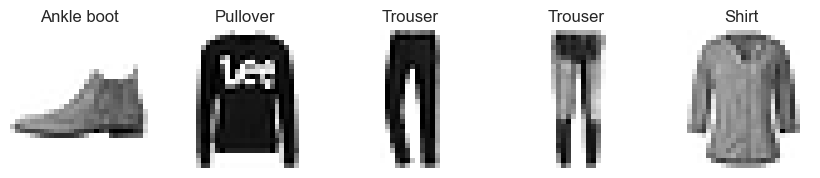

In [30]:
y_new = y_test[:5]
plt.figure(figsize=(9.2, 4.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()